In [1]:
import pandas as pd

In [30]:
df = pd.read_csv("D:\\KCE\\aiml - training\\Dataset\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='average')
hc.fit(df)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [40]:
hc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

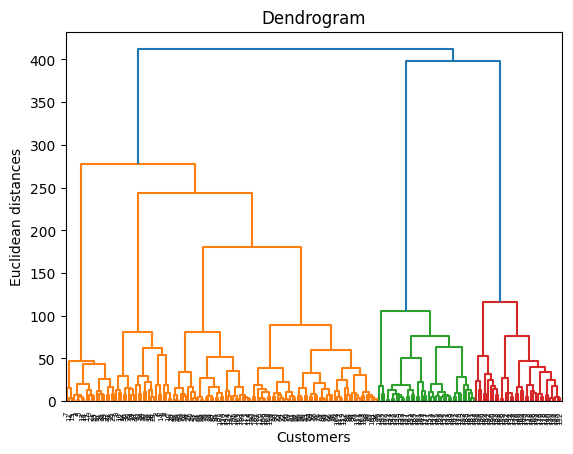

In [41]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()



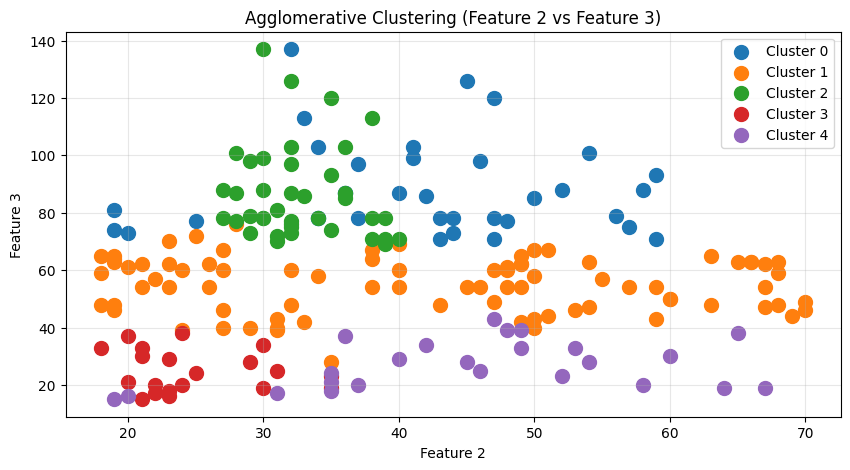

In [42]:
labels = hc.fit_predict(df)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for cluster in range(5):
    mask = labels == cluster
    plt.scatter(
        df.iloc[mask, 1],   # Feature 2
        df.iloc[mask, 2],   # Feature 3
        s=100,
        label=f'Cluster {cluster}'
    )

plt.title('Agglomerative Clustering (Feature 2 vs Feature 3)')
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


